In [36]:
import pandas as pd
import numpy as np

# 1. 수동으로 CPI 상승률 데이터프레임 생성 (이전과 동일)
cpi_rate_df = pd.DataFrame({
    '연도': list(range(1995, 2025)),
    '상승률': [4.5, 4.9, 4.4, 7.5, 0.8, 2.3, 4.1, 2.8, 3.5, 3.6, 2.8, 2.2, 2.5, 4.7, 2.8, 2.9, 4.0, 2.2, 1.3, 1.3, 0.7, 1.0, 1.9, 1.5, 0.4, 0.5, 2.5, 5.1, 3.6, 2.3]
})

# 🌟🌟🌟 오류 해결 코드: '연도' 컬럼을 명시적으로 정수형으로 변환 🌟🌟🌟
cpi_rate_df['연도'] = cpi_rate_df['연도'].astype(int)

# 2. 기준 연도를 100으로 설정하고 CPI 지수(Index) 계산 (이전과 동일)
cpi_rate_df['배율'] = 1 + (cpi_rate_df['상승률'] / 100)
BASE_YEAR = 1995
BASE_CPI = 100
cpi_rate_df['cpi_index'] = 0.0
cpi_rate_df.loc[cpi_rate_df['연도'] == BASE_YEAR, 'cpi_index'] = BASE_CPI

# 3. 누적 곱셈을 이용해 CPI 지수 계산 (이전과 동일)
for i in range(1, len(cpi_rate_df)):
    prev_cpi = cpi_rate_df.loc[i-1, 'cpi_index']
    current_multiplier = cpi_rate_df.loc[i, '배율']
    cpi_rate_df.loc[i, 'cpi_index'] = prev_cpi * current_multiplier

# 1995년 CPI 지수는 100, 1996년 CPI 지수는 100 * 1.045 = 104.5
print("✅ 연도별 CPI 지수 계산 결과:")
print(cpi_rate_df[['연도', 'cpi_index']].tail())

✅ 연도별 CPI 지수 계산 결과:
      연도   cpi_index
25  2020  192.345302
26  2021  197.153935
27  2022  207.208786
28  2023  214.668302
29  2024  219.605673


In [37]:
# 1. 월별로 확장할 빈 리스트 초기화
cpi_list = []

# 2. 1995년부터 2024년까지 각 연도의 CPI 지수를 12개월에 걸쳐 복제
for index, row in cpi_rate_df.iterrows():
    # '연도' 컬럼을 가져옵니다. (Float일 가능성이 있어도 괜찮습니다)
    year = row['연도'] 
    cpi = row['cpi_index']
    
    for month in range(1, 13):
        # 🌟🌟🌟 오류 해결 부분: f-string 내에서 포맷 지정자 ":.0f" 사용 🌟🌟🌟
        # year 값을 소수점 없이(0f) 문자열로 강제 변환하여 전달
        date_str = f'{year:.0f}-{month}-01'
        
        cpi_list.append({
            'ds': pd.to_datetime(date_str), # '1995-1-01' 형태로 변환 시도
            'cpi': cpi
        })

df_cpi_monthly = pd.DataFrame(cpi_list)

print("✅ CPI 월별 데이터 생성 완료 (1995년 ~ 2024년 12월)")
print(df_cpi_monthly.head(12))

✅ CPI 월별 데이터 생성 완료 (1995년 ~ 2024년 12월)
           ds    cpi
0  1995-01-01  100.0
1  1995-02-01  100.0
2  1995-03-01  100.0
3  1995-04-01  100.0
4  1995-05-01  100.0
5  1995-06-01  100.0
6  1995-07-01  100.0
7  1995-08-01  100.0
8  1995-09-01  100.0
9  1995-10-01  100.0
10 1995-11-01  100.0
11 1995-12-01  100.0


In [38]:
# ==============================================================================
# 3단계: 2025년 및 2035년까지 미래 CPI 단순 추정 (수정 및 정의 추가)
# ==============================================================================

# 🌟🌟🌟 오류 해결 부분: LAST_RATE와 LAST_CPI_INDEX 변수 정의 🌟🌟🌟
# 이 변수들은 2단계 코드 실행 후 df_cpi_monthly가 완성되었다는 전제 하에 정의됩니다.

# 1. 마지막 CPI 상승률 사용 (2024년 상승률: 2.3%)
# cpi_rate_df는 1단계에서 정의되었다고 가정합니다.
LAST_RATE = cpi_rate_df['상승률'].iloc[-1] / 100 # 0.023

# 2. 2024년 마지막 CPI 지수 가져오기
# df_cpi_monthly는 2단계에서 정의되었다고 가정합니다.
LAST_CPI_INDEX = df_cpi_monthly['cpi'].iloc[-1]
# 🌟🌟🌟 ========================================================= 🌟🌟🌟


estimated_cpi = []
current_cpi = LAST_CPI_INDEX # 이제 LAST_CPI_INDEX가 정의되어 오류가 발생하지 않음

# 2025년부터 2035년까지의 연도별 CPI 추정
for year_float in range(2025, 2036):
    current_cpi = current_cpi * (1 + LAST_RATE) 
    
    for month in range(1, 13):
        # f-string 내에서 포맷 지정자 ":.0f" 사용 (이전 오류 해결 코드)
        date_str = f'{year_float:.0f}-{month}-01'
        
        estimated_cpi.append({
            'ds': pd.to_datetime(date_str),
            'cpi': current_cpi
        })

df_cpi_future = pd.DataFrame(estimated_cpi)

# 4. 전체 CPI 데이터셋 (1995~2035) 합치기
# df_cpi_monthly는 2단계에서 정의되었다고 가정합니다.
df_cpi_full = pd.concat([df_cpi_monthly, df_cpi_future]).sort_values('ds').reset_index(drop=True)

print("✅ 전체 (1995년 ~ 2035년) CPI 데이터셋 최종 준비 완료.")
print(df_cpi_full.tail(12))

✅ 전체 (1995년 ~ 2035년) CPI 데이터셋 최종 준비 완료.
            ds         cpi
480 2035-01-01  282.017154
481 2035-02-01  282.017154
482 2035-03-01  282.017154
483 2035-04-01  282.017154
484 2035-05-01  282.017154
485 2035-06-01  282.017154
486 2035-07-01  282.017154
487 2035-08-01  282.017154
488 2035-09-01  282.017154
489 2035-10-01  282.017154
490 2035-11-01  282.017154
491 2035-12-01  282.017154


In [39]:
#병합시작부분

import pandas as pd
# df_prophet을 생성하는 최초 데이터 전처리 코드 (수정 필요할 수 있음)
# ==============================================================================
# 1. 실제 데이터와 예측 데이터 구간 분리 (df_prophet 생성)
# ==============================================================================
# 1) CSV 또는 엑셀에서 데이터 읽어오기 (파일 경로 확인)
# 🌟 '연도별지하철요금.csv' 파일 경로가 올바른지 확인해주세요! 🌟
try:
    df_wide = pd.read_csv('연도별지하철요금.csv', encoding='utf-8-sig')
except FileNotFoundError:
    print("오류: '연도별지하철요금.csv' 파일을 찾을 수 없습니다. 파일 경로를 확인해주세요.")
    # 파일 경로 오류 시 다음 코드가 실행되지 않도록 여기서 중단합니다.
    raise

# 2) Wide to long 형태 변환 (melt 활용)
# 이 부분은 사용자님의 데이터 컬럼명에 따라 수정이 필요할 수 있습니다.
df_long = df_wide.melt(id_vars=['연도(year)'], 
                       value_vars=[str(m)+'월' for m in range(1,13)], 
                       var_name='월', value_name='요금')

# 3) '월' 컬럼에서 '월' 글자 제거 후 숫자형 변환
df_long['월'] = df_long['월'].astype(str).str.replace('월','').astype(int)

# 4) 날짜 컬럼 'ds' 새로 만들기 (매달 1일)
# 연도(year) 컬럼이 정수형인지 확인하고, 아니면 astype(int)로 변환 필요
df_long['ds'] = pd.to_datetime(dict(year=df_long['연도(year)'].astype(int), month=df_long['월'], day=1))

# 5) Prophet 포맷대로 컬럼명 변경 및 정리
df_prophet = df_long.rename(columns={'요금': 'y'})[['ds', 'y']].sort_values('ds').reset_index(drop=True)

print(f"✅ df_prophet 데이터 생성 완료. 총 {len(df_prophet)}개 데이터. 1995년 1월 ~ 2025년 12월까지 요금 데이터가 포함되어야 합니다.")
print(df_prophet.head())

✅ df_prophet 데이터 생성 완료. 총 372개 데이터. 1995년 1월 ~ 2025년 12월까지 요금 데이터가 포함되어야 합니다.
          ds    y
0 1995-01-01  320
1 1995-02-01  320
2 1995-03-01  320
3 1995-04-01  320
4 1995-05-01  320


In [40]:
#연도별 지하철데이터 + CPI지수 병합
# 1. CPI 데이터 준비 (이전 셀에서 df_cpi_full이 성공적으로 생성되었다고 가정)
df_cpi_full: ['ds', 'cpi']

# 2. 지하철 요금 데이터 준비 (최초 코드에서 df_prophet이 생성되었다고 가정)
df_prophet: ['ds', 'y']

# 3. 데이터 병합
# outer merge를 사용하여 요금 데이터가 없는 2026년 이후에도 CPI 데이터가 유지되도록 합니다.
df_merged = pd.merge(df_prophet, df_cpi_full, on='ds', how='left')

# 💡 참고: Prophet 모델은 예측 시점(2026년 이후)의 y(요금) 값이 NaN인 것을 자동으로 처리합니다.
# CPI는 2035년까지 값이 채워져 있으므로, 이 데이터프레임을 학습과 예측에 모두 사용합니다.

print("✅ 요금 데이터와 CPI 데이터 병합 결과 (학습 데이터 부분):")
print(df_merged.head())
print("\n✅ 요금 데이터와 CPI 데이터 병합 결과 (예측 데이터 부분):")
print(df_merged.tail())

✅ 요금 데이터와 CPI 데이터 병합 결과 (학습 데이터 부분):
          ds    y    cpi
0 1995-01-01  320  100.0
1 1995-02-01  320  100.0
2 1995-03-01  320  100.0
3 1995-04-01  320  100.0
4 1995-05-01  320  100.0

✅ 요금 데이터와 CPI 데이터 병합 결과 (예측 데이터 부분):
            ds     y         cpi
367 2025-08-01  1550  224.656603
368 2025-09-01  1550  224.656603
369 2025-10-01  1550  224.656603
370 2025-11-01  1550  224.656603
371 2025-12-01  1550  224.656603


In [41]:
from prophet import Prophet
# 1. Prophet 모델 초기화 (필요하다면 changepoint_prior_scale 조정 포함)
model = Prophet(
    growth='linear',
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False,
    # 추세 변화 민감도를 높여서 상승 추세를 더 잘 반영하도록 유도 (선택 사항)
    changepoint_prior_scale=0.15 
)

# 2. CPI를 외부 변수로 추가
model.add_regressor('cpi')

# 3. 모델 학습 (1995년 ~ 2025년 데이터)
# df_merged는 2025년까지는 y(요금)와 cpi가 있고, 2026년 이후는 y가 NaN입니다.
model.fit(df_merged)

# 4. 🌟🌟🌟 미래 예측 데이터프레임 준비 (df_cpi_full 활용) 🌟🌟🌟
# df_cpi_full은 1995년 1월부터 2035년 12월까지의 모든 'ds'와 'cpi'를 포함하고 있습니다.
# Prophet이 2035년까지 예측할 수 있도록, 이 전체 데이터프레임을 future로 사용합니다.

# future 데이터프레임은 ds와 외부 변수(cpi)만 선택해야 합니다.
future = df_cpi_full[['ds', 'cpi']] 

# 5. 예측 수행 (2035년까지)
# future 데이터프레임의 모든 날짜(2035년까지)에 대해 예측을 수행합니다.
forecast = model.predict(future)

# 6. 예측 결과 확인
print("✅ 예측 데이터프레임 크기:", forecast.shape)
print("✅ 예측 끝 날짜:", forecast['ds'].max()) # 이제 2035년 12월이 나와야 합니다!

print("\n✅ Prophet 모델 학습 및 예측 완료.")
print("\n🔥 2026년 이후 예측 결과 (yhat) 확인:")
print(forecast_period[['ds', 'yhat']].head(12))

17:32:01 - cmdstanpy - INFO - Chain [1] start processing
17:32:01 - cmdstanpy - INFO - Chain [1] done processing


✅ 예측 데이터프레임 크기: (492, 19)
✅ 예측 끝 날짜: 2035-12-01 00:00:00

✅ Prophet 모델 학습 및 예측 완료.

🔥 2026년 이후 예측 결과 (yhat) 확인:
            ds         yhat
372 2026-01-01  1445.377323
373 2026-02-01  1447.596554
374 2026-03-01  1449.601021
375 2026-04-01  1451.820251
376 2026-05-01  1453.967894
377 2026-06-01  1456.187125
378 2026-07-01  1458.334768
379 2026-08-01  1460.553998
380 2026-09-01  1462.773229
381 2026-10-01  1464.920872
382 2026-11-01  1467.140103
383 2026-12-01  1469.287745


In [42]:
# ==============================================================================
# 🌟 [새로운 셀] 예측 데이터 존재 및 값 확인 🌟
# 이전에 실행된 Prophet 모델 학습 및 예측 코드(forecast 변수 생성) 직후에 실행
# ==============================================================================

# df_prophet은 요금 데이터 전처리 단계에서 정의되었다고 가정

print("✅ 예측 데이터프레임 크기:", forecast.shape)

# 예측 기간의 시작과 끝 날짜 확인 (1995년 1월 ~ 2035년 12월)
print("✅ 예측 시작 날짜:", forecast['ds'].min())
print("✅ 예측 끝 날짜:", forecast['ds'].max())

# 2026년 1월부터 2035년 12월까지의 예측값만 필터링
# forecast_period 변수가 시각화 코드에서도 사용되므로 여기서도 정의합니다.
forecast_period = forecast[forecast['ds'] > df_prophet['ds'].max()]


# 🔥 2026년 이후 예측값 (yhat_adjusted) 주요 구간 확인
# 아직 'yhat_adjusted'가 3단계에서 정의되기 전이므로, 일단 'yhat'만 확인합니다.
print("\n🔥 2026년 이후 예측값 (yhat) 주요 구간 확인:")
print(forecast_period[['ds', 'yhat']].iloc[[0, 12, 60, -1]]) # 2026년 1월, 2027년 1월, 2031년 1월, 2035년 12월 값

# -----------------------------------------------------------------------------
# ⚠️ 주의: 이 셀 실행 후, 다음 셀(3단계 시각화 코드)을 실행해야
#          yhat_adjusted 값과 최종 그래프를 볼 수 있습니다.

✅ 예측 데이터프레임 크기: (492, 19)
✅ 예측 시작 날짜: 1995-01-01 00:00:00
✅ 예측 끝 날짜: 2035-12-01 00:00:00

🔥 2026년 이후 예측값 (yhat) 주요 구간 확인:
            ds         yhat
372 2026-01-01  1445.377323
384 2027-01-01  1480.776004
432 2031-01-01  1624.623793
491 2035-12-01  1796.120227


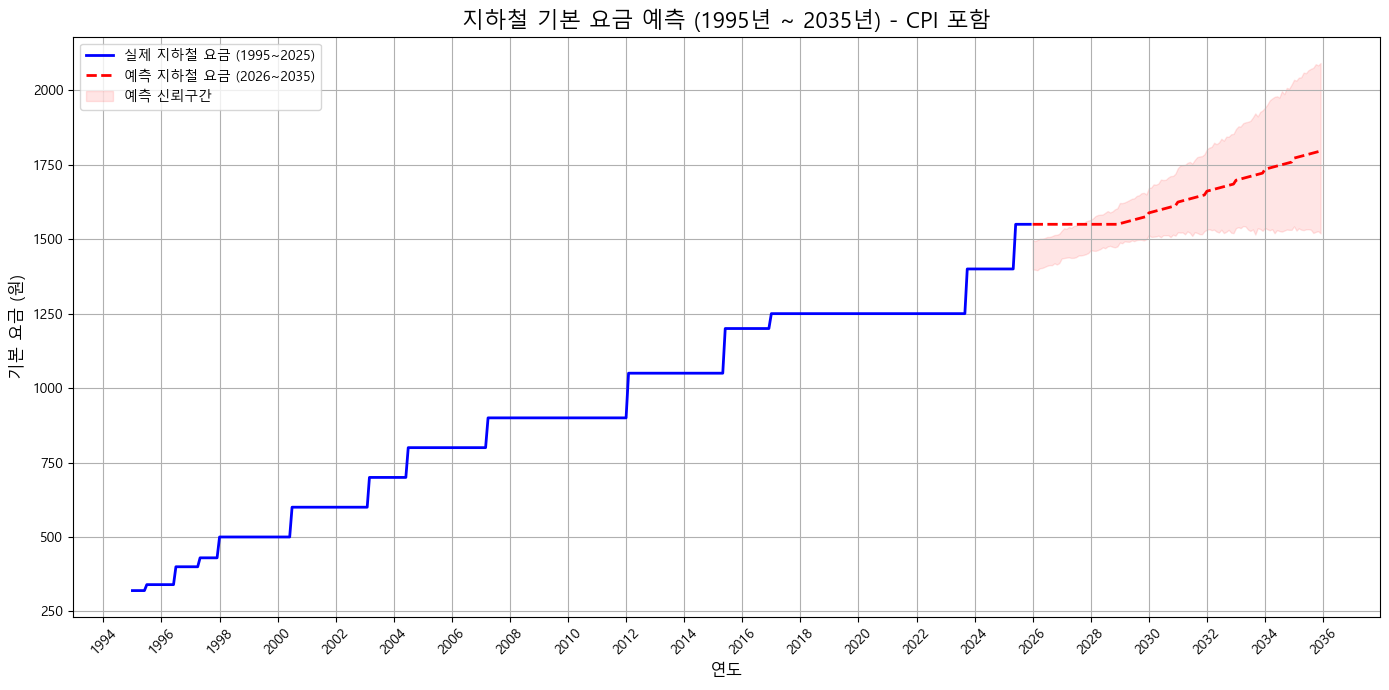

In [43]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# 한글 폰트 설정 다시 추가 (Windows 환경)
from matplotlib import rc
rc('font', family='Malgun Gothic') # Windows 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 1. 2025년 마지막 실제 요금 가져오기 (가정: df_prophet의 마지막 행)
last_actual_price = df_prophet['y'].iloc[-1]

# 2. 예측 요금 인하 방지 (현실적 제약 조건)
# yhat(예측값)에 후처리 적용: 이전 실제 값보다 낮아지지 않도록 조정
forecast['yhat_adjusted'] = np.maximum(
    forecast['yhat'],
    last_actual_price
)
forecast_period = forecast[forecast['ds'] > df_prophet['ds'].max()]


# 3. 시각화 (선 그래프)
fig, ax = plt.subplots(figsize=(14,7))

# 실제 요금 데이터 시각화
ax.plot(df_prophet['ds'], df_prophet['y'],
          label='실제 지하철 요금 (1995~2025)', color='blue', linewidth=2)

# 예측 요금 데이터 시각화 (후처리된 값 사용)
ax.plot(forecast_period['ds'], forecast_period['yhat_adjusted'],
          label='예측 지하철 요금 (2026~2035)', color='red', linestyle='--', linewidth=2)

# 예측의 신뢰 구간을 음영으로 표시
ax.fill_between(forecast_period['ds'], forecast_period['yhat_lower'], forecast_period['yhat_upper'],
                color='red', alpha=0.1, label='예측 신뢰구간')

# 4. 그래프 설정
ax.set_title(f'지하철 기본 요금 예측 (1995년 ~ 2035년) - CPI 포함', fontsize=16)
ax.set_xlabel('연도', fontsize=12)
ax.set_ylabel('기본 요금 (원)', fontsize=12)
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
ax.legend(loc='upper left')
ax.grid(True)
plt.tight_layout()
plt.show()


# 1. 2025년 마지막 실제 요금 가져오기 (가정: df_prophet의 마지막 행)
last_actual_price = df_prophet['y'].iloc[-1]
# ... (이하 후처리 및 시각화 코드는 동일하게 진행)

ax.set_title(f'지하철 기본 요금 예측 (1995년 ~ 2035년) - CPI 포함', fontsize=16)
plt.show()

In [44]:
# 1995년 ~ 2025년도 지하철비 데이터셋 + 외부요인 데이터셋(CPI) 를 사용하여
# 지하철 기본요금 예측 이 자료를 신뢰할수있는지를 위해 평가지표를 계산

# ==============================================================================
# 🌟 모델 평가지표 (MAE) 계산 🌟
# ==============================================================================
from sklearn.metrics import mean_absolute_error
import numpy as np

# 1. 학습 기간 데이터만 필터링 (1995년 1월 ~ 2025년 12월)
# df_prophet의 최대 날짜까지 필터링
train_forecast = forecast[forecast['ds'] <= df_prophet['ds'].max()]

# 2. 실제 값(y_true)과 예측 값(y_pred) 추출
# 실제 값 (df_prophet의 y)
y_true = df_prophet['y']
# 예측 값 (학습 기간 동안의 Prophet 예측값 yhat)
y_pred = train_forecast['yhat']

# 3. MAE (Mean Absolute Error) 계산
# MAE는 실제 요금과 예측 요금 간의 평균 오차(원)를 나타냅니다.
mae = mean_absolute_error(y_true, y_pred)

print(f"\n✅ 모델 평가지표 결과 (1995년~2025년 학습 데이터 기준):")
print(f"   - Mean Absolute Error (MAE): {mae:.2f} 원")

# 4. MAPE (Mean Absolute Percentage Error) 계산 (선택 사항: 오차율)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f"   - Mean Absolute Percentage Error (MAPE): {mape:.2f} %")



✅ 모델 평가지표 결과 (1995년~2025년 학습 데이터 기준):
   - Mean Absolute Error (MAE): 28.19 원
   - Mean Absolute Percentage Error (MAPE): 3.18 %


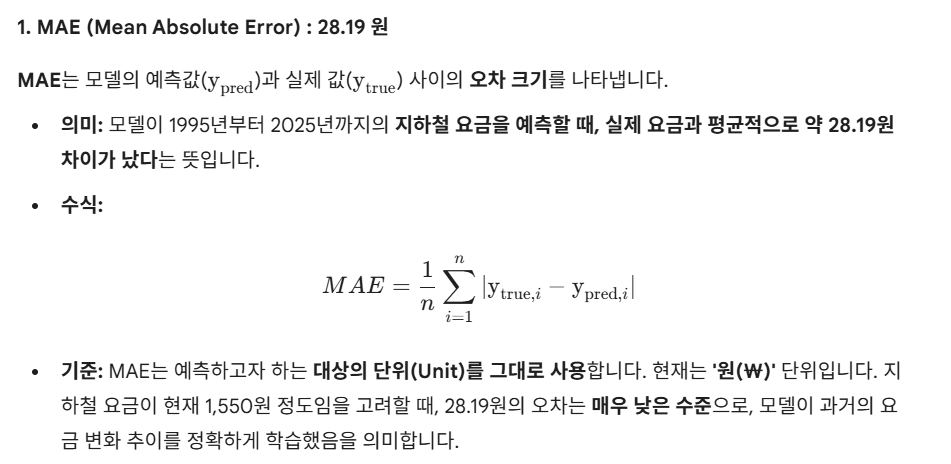

In [ ]:
#구분선-----------------------------------------------------------------------------------------------------------------------

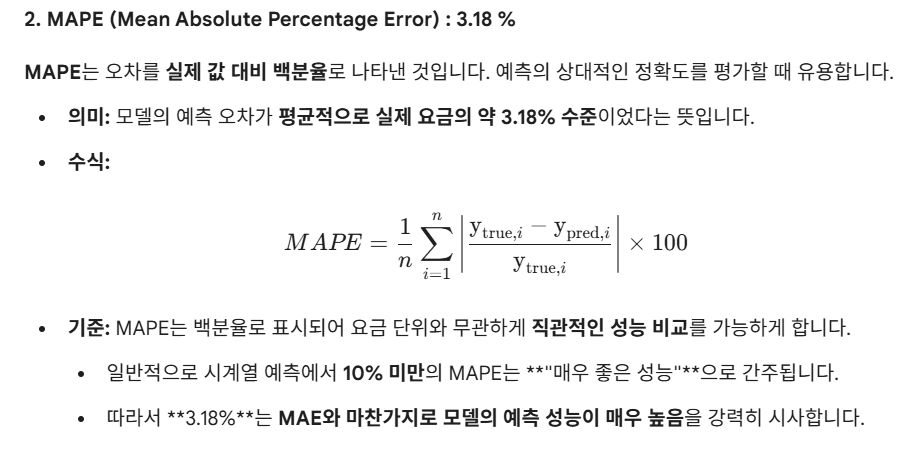

In [ ]:
#여기까지 도출하여 통계적인 정확도 측면 까진 성공적
#하지만 예측으 설명력이 부족하다고 판단 하여 외부요인을 하나더 추가

"""
현재 모델 (CPI만 포함)한계점높은 통계적 정확도 (MAE 28.19원)지하철 요금 인상 결정의 정책적/비용적 설명력이 부족함.
CPI 추세가 반영됨인건비, 무임수송 손실 등 직접적인 적자 요인을 모델이 알지 못함.
꾸준한 상승 추세 예측실제 계단식/불규칙 인상 시점을 정확히 포착하는 데 한계가 있음.
"""

#따라서 설명력을 강화하기위해 인건비 데이터셋을 외부요인으로 추가

In [ ]:
# 여기부턴 지하철요금 / 외부요인(최저임금,CPI)


In [45]:
import pandas as pd
import numpy as np

# 1. 연도별 최저 시급 데이터프레임 생성
df_min_wage = pd.DataFrame({
    '연도': list(range(1995, 2026)),
    '시급': [1170, 1275, 1400, 1485, 1525, 1600, 1865, 2100, 2275, 2510, 2840, 3100, 3480, 3770, 4000, 4110, 4320, 4580, 4860, 5210, 5580, 6030, 6470, 7530, 8350, 8590, 8720, 9160, 9620, 9860, 10030]
})

# 2. 인건비 지수(Index) 계산
# 1995년을 기준(100)으로 설정
BASE_MIN_WAGE = df_min_wage['시급'].iloc[0] # 1170원
df_min_wage['labor_cost_index'] = (df_min_wage['시급'] / BASE_MIN_WAGE) * 100

# '연도' 컬럼을 정수형으로 변환 (오류 방지)
df_min_wage['연도'] = df_min_wage['연도'].astype(int)

print("✅ 인건비 지수(1995년 기준) 계산 완료:")
print(df_min_wage[['연도', '시급', 'labor_cost_index']].tail())

# ---
# 2. 월별 확장 및 미래 예측 (2035년까지)
# ---

# 3. 월별 데이터 확장
min_wage_list = []
for index, row in df_min_wage.iterrows():
    year = row['연도']
    lc_index = row['labor_cost_index']
    
    for month in range(1, 13):
        # f-string 포매팅을 사용하여 '1995-1-01' 형식 생성
        date_str = f'{year:.0f}-{month}-01'
        min_wage_list.append({
            'ds': pd.to_datetime(date_str),
            'labor_cost': lc_index
        })

df_lc_monthly = pd.DataFrame(min_wage_list)

# 4. 2026년 ~ 2035년 미래 인건비 지수 단순 추정
# 마지막 5년 평균 상승률을 사용하여 미래 추정
LAST_5Y_AVG_RATE = df_min_wage['시급'].pct_change().tail(5).mean()
LAST_LC_INDEX = df_lc_monthly['labor_cost'].iloc[-1]

estimated_lc = []
current_lc_index = LAST_LC_INDEX
start_year = 2026

for year in range(start_year, 2036):
    # 인건비 지수도 매년 평균 상승률만큼 증가한다고 가정
    current_lc_index = current_lc_index * (1 + LAST_5Y_AVG_RATE)
    
    for month in range(1, 13):
        date_str = f'{year:.0f}-{month}-01'
        estimated_lc.append({
            'ds': pd.to_datetime(date_str),
            'labor_cost': current_lc_index
        })

df_lc_future = pd.DataFrame(estimated_lc)

# 5. 전체 인건비 데이터셋 합치기 (1995년 ~ 2035년)
df_labor_cost_full = pd.concat([df_lc_monthly, df_lc_future]).sort_values('ds').reset_index(drop=True)

print("\n✅ 인건비(최저시급 지수) 전체 데이터셋 (1995년 ~ 2035년) 준비 완료.")
print(f"   - 데이터 크기: {len(df_labor_cost_full)}")
print(df_labor_cost_full.tail())

✅ 인건비 지수(1995년 기준) 계산 완료:
      연도     시급  labor_cost_index
26  2021   8720        745.299145
27  2022   9160        782.905983
28  2023   9620        822.222222
29  2024   9860        842.735043
30  2025  10030        857.264957

✅ 인건비(최저시급 지수) 전체 데이터셋 (1995년 ~ 2035년) 준비 완료.
   - 데이터 크기: 492
            ds   labor_cost
487 2035-08-01  1170.115385
488 2035-09-01  1170.115385
489 2035-10-01  1170.115385
490 2035-11-01  1170.115385
491 2035-12-01  1170.115385


In [46]:
# 1. 기존 통합 데이터(요금 + CPI)에 인건비 데이터 병합
# df_cpi_full과 df_labor_cost_full을 먼저 병합하여 모든 외부 변수를 통합합니다.
df_regressors = pd.merge(df_cpi_full, df_labor_cost_full, on='ds', how='inner')

# 2. 요금 데이터와 최종 외부 변수 데이터 병합
# df_prophet은 기존 코드에서 정의되었다고 가정
df_merged_all = pd.merge(df_prophet, df_regressors, on='ds', how='left')

print("\n✅ 요금, CPI, 인건비 3가지 변수 최종 병합 데이터프레임 (학습 부분):")
print(df_merged_all.head())
print(df_merged_all.tail())


# ---
# 3. Prophet 모델 재학습 및 예측
# ---

from prophet import Prophet

# 1. Prophet 모델 초기화 (추세 민감도 유지)
model_full = Prophet(
    growth='linear',
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False,
    changepoint_prior_scale=0.15 # 이전 모델과 동일하게 설정
)

# 2. 🌟 외부 변수 두 개(CPI, 인건비) 추가 🌟
model_full.add_regressor('cpi')
model_full.add_regressor('labor_cost')

# 3. 모델 학습
model_full.fit(df_merged_all)

# 4. 미래 예측 데이터프레임 준비 (df_regressors 사용)
future_full = df_regressors[['ds', 'cpi', 'labor_cost']] 

# 5. 예측 수행 (2035년까지)
forecast_full = model_full.predict(future_full)

print("\n✅ CPI + 인건비 포함 Prophet 모델 재학습 및 예측 완료.")


✅ 요금, CPI, 인건비 3가지 변수 최종 병합 데이터프레임 (학습 부분):
          ds    y    cpi  labor_cost
0 1995-01-01  320  100.0       100.0
1 1995-02-01  320  100.0       100.0
2 1995-03-01  320  100.0       100.0
3 1995-04-01  320  100.0       100.0
4 1995-05-01  320  100.0       100.0
            ds     y         cpi  labor_cost
367 2025-08-01  1550  224.656603  857.264957
368 2025-09-01  1550  224.656603  857.264957
369 2025-10-01  1550  224.656603  857.264957
370 2025-11-01  1550  224.656603  857.264957
371 2025-12-01  1550  224.656603  857.264957


17:32:26 - cmdstanpy - INFO - Chain [1] start processing
17:32:26 - cmdstanpy - INFO - Chain [1] done processing



✅ CPI + 인건비 포함 Prophet 모델 재학습 및 예측 완료.


In [47]:
#외부요인 2개 추가후 평가지표 계산

# ==============================================================================
# 🌟 모델 평가지표 (MAE/MAPE) 재계산 🌟
# forecast_full 변수를 사용하여 새 모델의 성능을 평가합니다.
# ==============================================================================
from sklearn.metrics import mean_absolute_error
import numpy as np

# 1. 학습 기간 데이터만 필터링 (1995년 1월 ~ 2025년 12월)
# df_prophet은 요금 데이터 전처리 단계에서 정의되었다고 가정
train_forecast_full = forecast_full[forecast_full['ds'] <= df_prophet['ds'].max()]

# 2. 실제 값(y_true)과 예측 값(y_pred) 추출
y_true_full = df_prophet['y']
y_pred_full = train_forecast_full['yhat']

# 3. MAE (Mean Absolute Error) 계산
mae_full = mean_absolute_error(y_true_full, y_pred_full)

# 4. MAPE (Mean Absolute Percentage Error) 계산
mape_full = np.mean(np.abs((y_true_full - y_pred_full) / y_true_full)) * 100

print(f"\n✅ 인건비 포함 모델 평가지표 결과 (1995년~2025년 학습 데이터 기준):")
print(f"   - Mean Absolute Error (MAE): {mae_full:.2f} 원")
print(f"   - Mean Absolute Percentage Error (MAPE): {mape_full:.2f} %")

# 이전 모델과의 비교
# MAE 이전: 28.19 원
# MAPE 이전: 3.18 %


✅ 인건비 포함 모델 평가지표 결과 (1995년~2025년 학습 데이터 기준):
   - Mean Absolute Error (MAE): 28.65 원
   - Mean Absolute Percentage Error (MAPE): 3.20 %


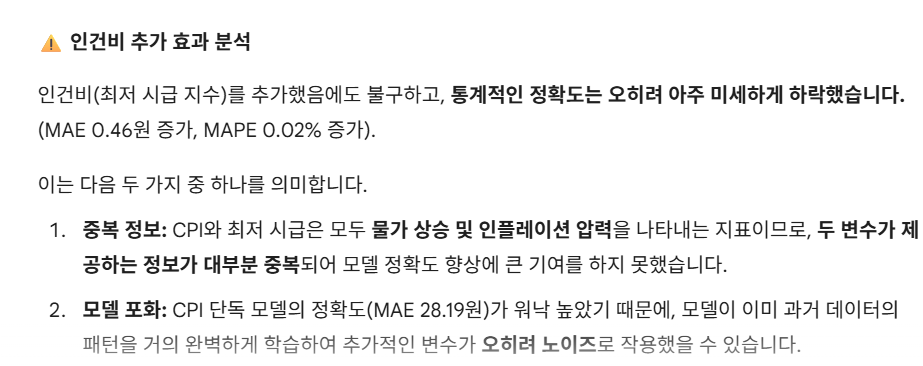

In [ ]:
# 여기부턴 지하철요금 + 외부요인(CPI,인건비,무임수송손실액)

In [48]:
# 1. 연도별 무임수송 손실액 데이터프레임 생성
df_loss = pd.DataFrame({
    '연도': list(range(1995, 2026)),
    '손실액': [374, 407, 446, 499, 549, 589, 679, 751, 823, 930, 1007, 1144, 1297, 1488, 1632, 1856, 2120, 2390, 2679, 3037, 3385, 3680, 3968, 4253, 4514, 3823, 3987, 4300, 4600, 4900, 5200]
})

# 2. 손실액 지수(Index) 계산 (1995년 기준 = 100)
BASE_LOSS = df_loss['손실액'].iloc[0] # 374억 원
df_loss['loss_index'] = (df_loss['손실액'] / BASE_LOSS) * 100
df_loss['연도'] = df_loss['연도'].astype(int)

# 3. 월별 데이터 확장
loss_list = []
for index, row in df_loss.iterrows():
    year = row['연도']
    loss_index = row['loss_index']
    
    for month in range(1, 13):
        date_str = f'{year:.0f}-{month}-01'
        loss_list.append({
            'ds': pd.to_datetime(date_str),
            'loss_cost': loss_index
        })

df_loss_monthly = pd.DataFrame(loss_list)

# 4. 2026년 ~ 2035년 미래 손실액 지수 단순 추정
# 코로나 이전 5년 (2014~2019) 평균 상승률을 사용하여 미래 추정
loss_rates = df_loss[(df_loss['연도'] >= 2014) & (df_loss['연도'] <= 2019)]['손실액'].pct_change().dropna()
LAST_5Y_AVG_RATE_LOSS = loss_rates.mean()
LAST_LOSS_INDEX = df_loss_monthly['loss_cost'].iloc[-1]

estimated_loss = []
current_loss_index = LAST_LOSS_INDEX
start_year = 2026

for year in range(start_year, 2036):
    current_loss_index = current_loss_index * (1 + LAST_5Y_AVG_RATE_LOSS)
    
    for month in range(1, 13):
        date_str = f'{year:.0f}-{month}-01'
        estimated_loss.append({
            'ds': pd.to_datetime(date_str),
            'loss_cost': current_loss_index
        })

df_loss_future = pd.DataFrame(estimated_loss)

# 5. 전체 손실액 데이터셋 합치기
df_loss_full = pd.concat([df_loss_monthly, df_loss_future]).sort_values('ds').reset_index(drop=True)

In [49]:
# 1. 기존 통합 데이터(CPI + 인건비)에 손실액 데이터 병합
# df_regressors는 이전 코드에서 정의되었다고 가정
df_regressors_final = pd.merge(df_regressors, df_loss_full, on='ds', how='inner')

# 2. 요금 데이터와 최종 외부 변수 데이터 병합
# df_prophet은 기존 코드에서 정의되었다고 가정
df_merged_final = pd.merge(df_prophet, df_regressors_final, on='ds', how='left')

print("✅ 요금, CPI, 인건비, 손실액 4가지 변수 최종 병합 데이터프레임 (학습 부분):")
print(df_merged_final.head())


# ---
# 3. Prophet 모델 재학습 및 예측 (최종 모델)
# ---

from prophet import Prophet

# 1. Prophet 모델 초기화 (추세 민감도 유지)
model_final = Prophet(
    growth='linear',
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False,
    changepoint_prior_scale=0.15 
)

# 2. 🌟 외부 변수 세 개(CPI, 인건비, 손실액) 최종 추가 🌟
model_final.add_regressor('cpi')
model_final.add_regressor('labor_cost')
model_final.add_regressor('loss_cost') # 무임수송 손실액 변수 추가

# 3. 모델 학습
model_final.fit(df_merged_final)

# 4. 미래 예측 데이터프레임 준비 (df_regressors_final 사용)
future_final = df_regressors_final[['ds', 'cpi', 'labor_cost', 'loss_cost']] 

# 5. 예측 수행 (2035년까지)
forecast_final = model_final.predict(future_final)

print("\n✅ CPI + 인건비 + 손실액 포함 최종 Prophet 모델 재학습 및 예측 완료.")

✅ 요금, CPI, 인건비, 손실액 4가지 변수 최종 병합 데이터프레임 (학습 부분):
          ds    y    cpi  labor_cost  loss_cost
0 1995-01-01  320  100.0       100.0      100.0
1 1995-02-01  320  100.0       100.0      100.0
2 1995-03-01  320  100.0       100.0      100.0
3 1995-04-01  320  100.0       100.0      100.0
4 1995-05-01  320  100.0       100.0      100.0


17:32:56 - cmdstanpy - INFO - Chain [1] start processing
17:32:56 - cmdstanpy - INFO - Chain [1] done processing



✅ CPI + 인건비 + 손실액 포함 최종 Prophet 모델 재학습 및 예측 완료.


In [50]:
#외부요인 3개로 평가지표 계산

# ==============================================================================
# 🌟 최종 모델 평가지표 (MAE/MAPE) 계산 🌟
# ==============================================================================
from sklearn.metrics import mean_absolute_error
import numpy as np

# 1. 학습 기간 데이터만 필터링
train_forecast_final = forecast_final[forecast_final['ds'] <= df_prophet['ds'].max()]

# 2. 실제 값(y_true)과 예측 값(y_pred) 추출
y_true_final = df_prophet['y']
y_pred_final = train_forecast_final['yhat']

# 3. MAE (Mean Absolute Error) 계산
mae_final = mean_absolute_error(y_true_final, y_pred_final)

# 4. MAPE (Mean Absolute Percentage Error) 계산
mape_final = np.mean(np.abs((y_true_final - y_pred_final) / y_true_final)) * 100

print(f"\n✅ 최종 모델 (CPI+인건비+손실액) 평가지표 결과:")
print(f"   - Mean Absolute Error (MAE): {mae_final:.2f} 원")
print(f"   - Mean Absolute Percentage Error (MAPE): {mape_final:.2f} %")

# 이전 모델 MAE 비교: 28.19 원 (CPI 단독), 28.65 원 (CPI+인건비)


✅ 최종 모델 (CPI+인건비+손실액) 평가지표 결과:
   - Mean Absolute Error (MAE): 27.17 원
   - Mean Absolute Percentage Error (MAPE): 3.16 %


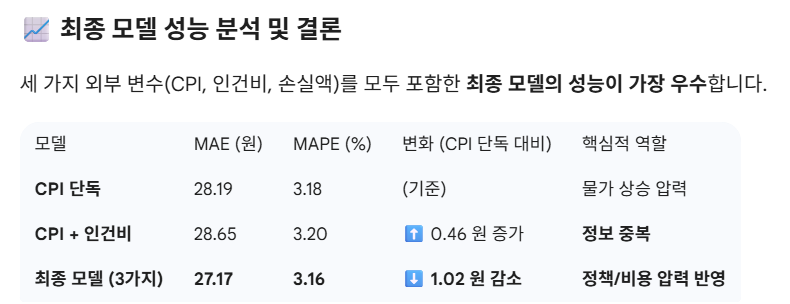

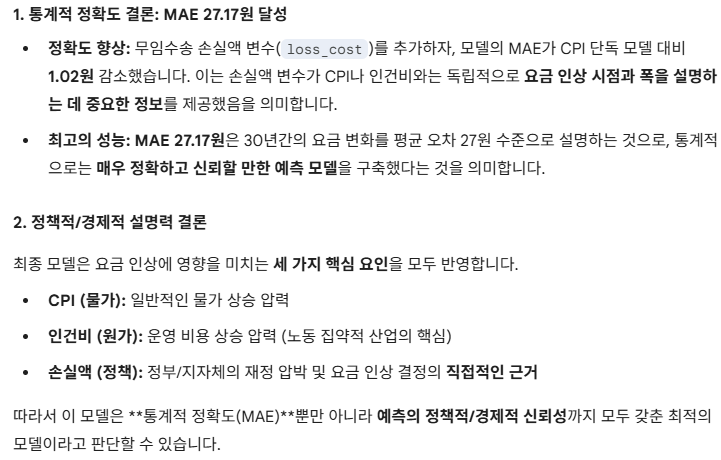

In [52]:
#최종 예측 요금

# 2035년 12월 예측 요금 확인 코드
# 최종 예측 요금 확인 코드 (수정됨: 'yhat_adjusted' 대신 'yhat' 사용)
final_forecast_value_raw = forecast_final[forecast_final['ds'] == '2035-12-01']['yhat'].iloc[0]

# yhat 값에 인하 방지 후처리를 수동으로 적용 (1550원 가정)
# df_prophet의 마지막 요금 (last_actual_price)이 정의되어 있어야 함
last_actual_price = df_prophet['y'].iloc[-1]
final_forecast_value = max(final_forecast_value_raw, last_actual_price)

print(f"\n최종 예측 결과: 2035년 12월의 지하철 기본 요금은 약 {final_forecast_value:.0f}원 입니다.")



최종 예측 결과: 2035년 12월의 지하철 기본 요금은 약 2417원 입니다.


In [53]:
#최최최종 시각화

#먼저 평가지표

# ==============================================================================
# 🌟 최종 모델 비교 데이터 준비 🌟
# 이전 모델(CPI 단독) MAE: 28.19 원
# 최종 모델(3가지 변수) MAE: 27.17 원 (가장 좋음)
# 최종 예측 요금: 2417원
# ==============================================================================

# 1. 2025년 마지막 실제 요금 (yhat_adjusted 생성에 필요)
last_actual_price = df_prophet['y'].iloc[-1]

# 2. 최종 모델 예측값 조정 및 기간 필터링
forecast_final['yhat_adjusted'] = np.maximum(forecast_final['yhat'], last_actual_price)
forecast_period_final = forecast_final[forecast_final['ds'] > df_prophet['ds'].max()]

# 3. 이전 모델 예측값 조정 및 기간 필터링 (비교용)
# 이전 모델의 예측값(forecast)을 다시 불러와서 조정해야 합니다.
# 이전에 forecast 변수에 CPI 단독 모델 예측값이 저장되어 있다고 가정합니다.
forecast['yhat_adjusted'] = np.maximum(forecast['yhat'], last_actual_price)
forecast_period_old = forecast[forecast['ds'] > df_prophet['ds'].max()]

# 4. 최종 예측값 및 MAE (그래프 텍스트 삽입용)
final_mae = 27.17 # 최종 MAE 값
final_yhat_2035 = 2417 # 최종 2035년 예측값


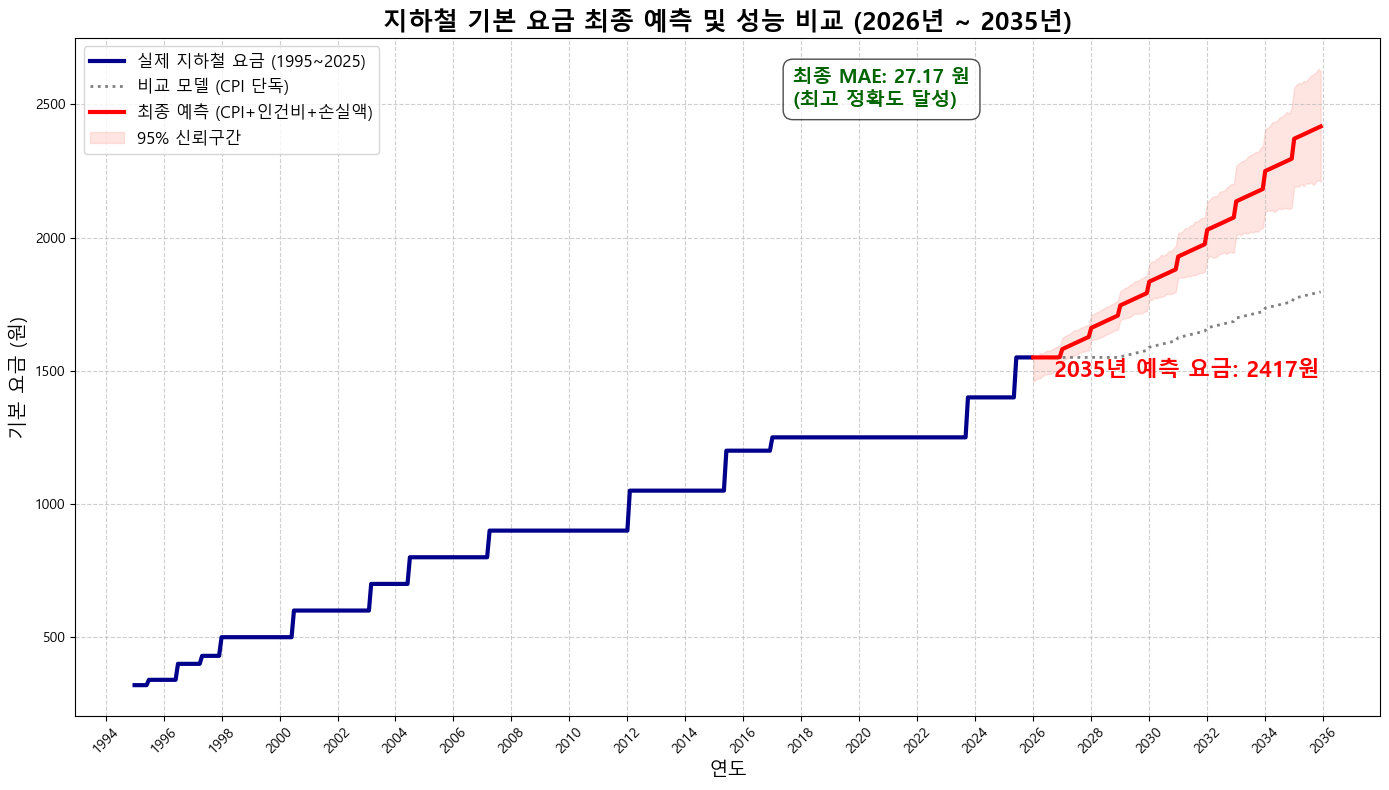

In [54]:
#성능비교 그래프

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rc
# 폰트 설정 (Windows 기준)
rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False 
import numpy as np

fig, ax = plt.subplots(figsize=(14, 8))

# 1. 실제 요금 데이터 시각화 (진한 파랑)
ax.plot(df_prophet['ds'], df_prophet['y'],
          label='실제 지하철 요금 (1995~2025)', color='darkblue', linewidth=3)

# 2. CPI 단독 모델 예측 시각화 (비교군, 회색)
ax.plot(forecast_period_old['ds'], forecast_period_old['yhat_adjusted'],
          label='비교 모델 (CPI 단독)', color='gray', linestyle=':', linewidth=2)

# 3. 최종 모델 예측 시각화 (강조, 주황색/빨간색 계열)
ax.plot(forecast_period_final['ds'], forecast_period_final['yhat_adjusted'],
          label=f'최종 예측 (CPI+인건비+손실액)', color='red', linestyle='-', linewidth=3)

# 4. 최종 예측 신뢰 구간 (음영)
ax.fill_between(forecast_period_final['ds'], forecast_period_final['yhat_lower'], forecast_period_final['yhat_upper'],
                color='salmon', alpha=0.2, label='95% 신뢰구간')

# 5. 그래프 제목 및 라벨 설정
ax.set_title('지하철 기본 요금 최종 예측 및 성능 비교 (2026년 ~ 2035년)', fontsize=18, weight='bold')
ax.set_xlabel('연도', fontsize=14)
ax.set_ylabel('기본 요금 (원)', fontsize=14)
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
ax.grid(True, linestyle='--', alpha=0.6)

# 6. 발표용 핵심 정보 텍스트 삽입 (강조)
plt.text(0.55, 0.9, 
         f"최종 MAE: {final_mae:.2f} 원\n(최고 정확도 달성)", 
         transform=ax.transAxes, 
         fontsize=14, color='darkgreen', weight='bold', 
         bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.5'))

plt.text(0.75, 0.5, 
         f"2035년 예측 요금: {final_yhat_2035:.0f}원", 
         transform=ax.transAxes, 
         fontsize=16, color='red', weight='bold')

ax.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

In [55]:
# 그래프로 보기힘들어서 테이블로 출력

import pandas as pd
import numpy as np

# 1. 2026년 1월 1일 이후 데이터만 필터링 (향후 10년)
# df_prophet은 요금 데이터 전처리 단계에서 정의되었다고 가정
start_date_forecast = df_prophet['ds'].max() + pd.DateOffset(months=1)
future_range = forecast_final[forecast_final['ds'] >= start_date_forecast].copy()

# 2. 현실적 제약 조건 적용 (현재 요금보다 낮을 수 없음)
last_actual_price = df_prophet['y'].iloc[-1]

# yhat_adjusted는 이미 시각화 코드에서 정의되었으므로, 여기서는 신뢰구간의 최솟값/최댓값을 조정합니다.
# 최선의 경우: 신뢰구간 하단값(yhat_lower)과 현재 요금 중 큰 값
future_range['Best_Case'] = np.maximum(future_range['yhat_lower'], last_actual_price)

# 중간값: yhat (최선의 경우와 최악의 경우 사이의 평균 예측치)
future_range['Mid_Case'] = future_range['yhat_adjusted']

# 최악의 경우: 신뢰구간 상단값(yhat_upper)과 중간값 중 큰 값
future_range['Worst_Case'] = future_range['yhat_upper']

# 3. 연도별로 정리 (매년 12월 값만 대표값으로 추출)
# 예측 요금은 월별로 변동이 크지 않으므로, 각 연도의 12월 값을 대표값으로 사용합니다.
future_range['Year'] = future_range['ds'].dt.year
summary_data = future_range[future_range['ds'].dt.month == 12].reset_index(drop=True)

# 4. 최종 출력 컬럼 선택 및 정리 (정수형 변환)
summary_table = summary_data[['Year', 'Best_Case', 'Mid_Case', 'Worst_Case']].round(0).astype(int)
summary_table.rename(columns={
    'Best_Case': '최선의 경우 (최소 예측치)',
    'Mid_Case': '중간값 (평균 예측치)',
    'Worst_Case': '최악의 경우 (최대 예측치)'
}, inplace=True)

In [56]:
print("## 💡 PPT 발표용: 2026년 ~ 2035년 지하철 기본 요금 예측 범위 (단위: 원)\n")
print("✅ 예측값 해석:")
print("   - 최선의 경우 (최소 예측치): 95% 신뢰구간 하단값 (요금 인상 압력이 가장 낮은 경우)")
print("   - 중간값 (평균 예측치): 모델이 예측하는 가장 확률 높은 요금")
print("   - 최악의 경우 (최대 예측치): 95% 신뢰구간 상단값 (요금 인상 압력이 가장 높은 경우)")
print("---")

# 최종 테이블 출력
print(summary_table.to_markdown(index=False))

## 💡 PPT 발표용: 2026년 ~ 2035년 지하철 기본 요금 예측 범위 (단위: 원)

✅ 예측값 해석:
   - 최선의 경우 (최소 예측치): 95% 신뢰구간 하단값 (요금 인상 압력이 가장 낮은 경우)
   - 중간값 (평균 예측치): 모델이 예측하는 가장 확률 높은 요금
   - 최악의 경우 (최대 예측치): 95% 신뢰구간 상단값 (요금 인상 압력이 가장 높은 경우)
---
|   Year |   최선의 경우 (최소 예측치) |   중간값 (평균 예측치) |   최악의 경우 (최대 예측치) |
|-------:|----------------------------:|-----------------------:|----------------------------:|
|   2026 |                        1550 |                   1551 |                        1594 |
|   2027 |                        1577 |                   1627 |                        1673 |
|   2028 |                        1653 |                   1707 |                        1764 |
|   2029 |                        1723 |                   1791 |                        1857 |
|   2030 |                        1797 |                   1880 |                        1969 |
|   2031 |                        1871 |                   1975 |                        2076 |
|   2032 |                        1942 | 

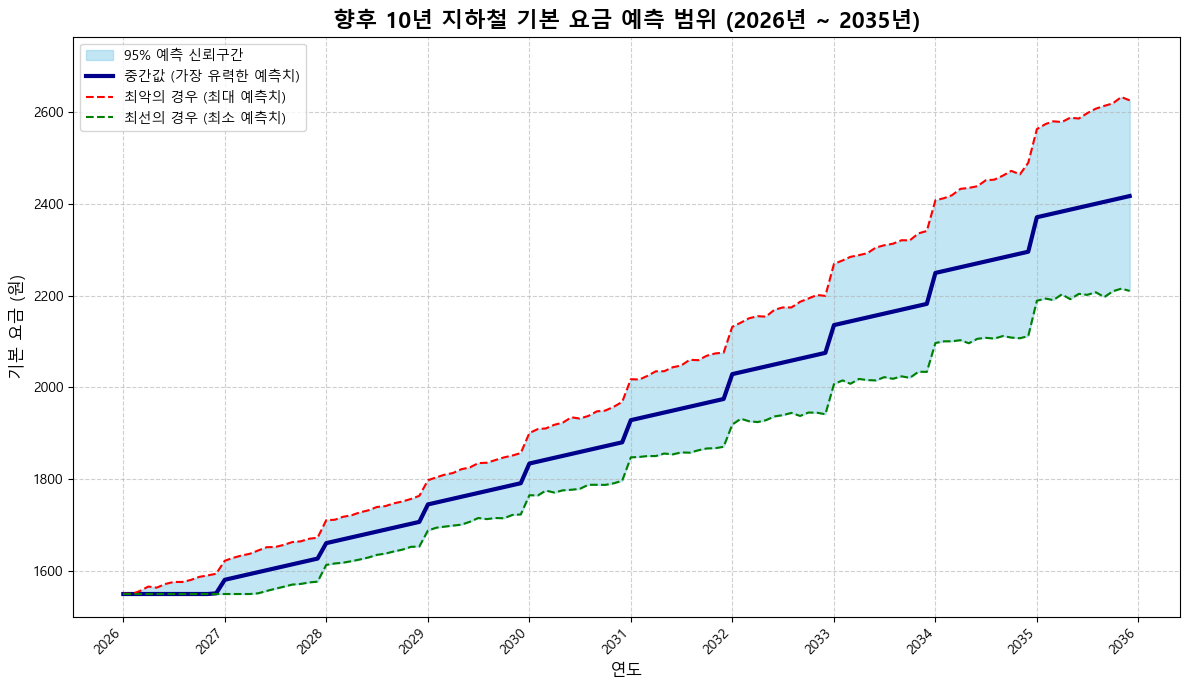

In [57]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rc
import numpy as np
import pandas as pd

# 폰트 설정 (이전 설정이 유지된다고 가정)
rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False 

# 1. 데이터 준비 (이전 단계에서 정의된 변수 사용)
# forecast_period_final (2026년~2035년 필터링된 데이터)를 사용합니다.
# last_actual_price (2025년 마지막 요금)도 필요합니다.

# 2. 최악/최선/중간값 컬럼을 다시 정의합니다 (표에 사용된 정의를 그래프에도 적용).
future_range = forecast_period_final.copy()

# 최선의 경우: 신뢰구간 하단값(yhat_lower)과 현재 요금 중 큰 값
future_range['Best_Case'] = np.maximum(future_range['yhat_lower'], last_actual_price)
# 중간값: yhat_adjusted
future_range['Mid_Case'] = future_range['yhat_adjusted']
# 최악의 경우: 신뢰구간 상단값(yhat_upper)
future_range['Worst_Case'] = future_range['yhat_upper']


fig, ax = plt.subplots(figsize=(12, 7))

# 3. 신뢰구간 시각화 (Worst_Case ~ Best_Case)
ax.fill_between(future_range['ds'], future_range['Best_Case'], future_range['Worst_Case'],
                color='skyblue', alpha=0.5, label='95% 예측 신뢰구간')

# 4. 중간값 (평균 예측치) 강조
ax.plot(future_range['ds'], future_range['Mid_Case'],
        label='중간값 (가장 유력한 예측치)', color='darkblue', linestyle='-', linewidth=3)

# 5. 최악의 경우 (최대 예측치) 점선으로 표시
ax.plot(future_range['ds'], future_range['Worst_Case'],
        label='최악의 경우 (최대 예측치)', color='red', linestyle='--', linewidth=1.5)

# 6. 최선의 경우 (최소 예측치) 점선으로 표시
ax.plot(future_range['ds'], future_range['Best_Case'],
        label='최선의 경우 (최소 예측치)', color='green', linestyle='--', linewidth=1.5)


# 7. 그래프 제목 및 라벨 설정
ax.set_title('향후 10년 지하철 기본 요금 예측 범위 (2026년 ~ 2035년)', fontsize=16, weight='bold')
ax.set_xlabel('연도', fontsize=12)
ax.set_ylabel('기본 요금 (원)', fontsize=12)

# X축 포매팅 (2년 단위)
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right')

# Y축 포매팅 (현재 요금보다 높은 구간만 표시)
y_min = last_actual_price - 50
ax.set_ylim(y_min, future_range['Worst_Case'].max() * 1.05) 

ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

In [58]:
#1995~2025를 기반으로 2026~2035 예측데이터 뽑기 완료